# POC-Turtle-8: clustering disjuncts `2018-04-14`
- Separate category learning and grammar learning;
- **Category Learner update**: clustering option: grouping identical contexts (former "Identical Lexical Entries" branch;
- **Grammar Learner**: Link Grammar rules based on connector sets ("relaxed rules") or disjunct sets ("strict rules");
- Tests: "POC-Turtle" corpus: [http://88.99.210.144/data/clustering_2018/data/POC_Turtle/](http://88.99.210.144/data/clustering_2018/data/POC_Turtle/);
- Test results: [http://88.99.210.144/data/clustering_2018/AGI-2018/POC-Turtle/](http://88.99.210.144/data/clustering_2018/AGI-2018/POC-Turtle/)

A static html copy of this notebook is shared via  
[http://88.99.210.144/data/clustering_2018/html/POC-Turtle-8-Test-MST-parses.html](http://88.99.210.144/data/clustering_2018/html/POC-Turtle-8-Test-MST-parses.html)

## Basic settings

In [1]:
import os, sys, time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path: sys.path.append(module_path)
from src.utl.utl import UTC
from src.utl.read_files import check_dir
print(UTC(), module_path)
prefix = '' # unused option
tmpath = module_path + '/tmp/'
check_dir(tmpath, True, 'none')
from src.grammar_learner.poc03 import learn_grammar

2018-04-14 15:24:25 UTC /home/obaskov/language-learning


## Gramar Learner settings, parameters, call

In [2]:
def test_learn_frammar(input_dir, prj_dir, left_wall, period, context, word_space, \
                       dim_reduction, clustering, grammar_rules, verbose='mid'):
    # Directory to read parse files (1 to many input files)
    #-input_dir = module_path + '/data/POC_Turtle/mst_fixed_manually/'
    # Paths to store learned categories, learned dictionary Link Grammar file
    #-batch_dir = module_path + '/output/POC_Turtle-2018-04-11/'    # Done 80411 ~OK
    #-batch_dir = module_path + '/output/POC_Turtle-2018-04-12/'    # Cleanup
    # prj_dir = batch_dir + 'MST_fixed_manually/disjuncts-DRK-disjuncts/'
    if check_dir(prj_dir, create=True, verbose='none'):
        cat_path = prj_dir  # Path to store learned categories
        dict_path = prj_dir # Path to store learned dictionary Link Grammar file

    # Settings:
    parse_mode = 'given'            # 'given' (default) / 'explosive' (next)
    #^left_wall = 'LEFT-WALL'       # '','none' / 'ABC' - replace ###LEFT-WALL### with ABC
    #^period = True                 # use period in links learning: True/False
    #-learn_mode = 'connectors_only': context = 1, window = 'mst', weighting = 'ppmi'
    #-learn_mode = 'lexical_entries': context = 2, group = True, 
    # learn_mode decomposed:
    #^context = 1                     # 1: connectors / 0: 'words' /
    #^context = 2                     # 2,3...: disjuncts with limited number of links
    window = 'mst'                  # 'mst' / reserved options for «explosive» parsing
    weighting = 'ppmi'              # 'ppmi' / future options
    group = True                    # group items after link parsing, sum counts 
    #^word_space = 'vectors'        # 'vectors' - dimensionality reduction with SVM
    #^word_space = 'discrete'       #  'discrete' - no dimensionality reduction
    dim_max = 100                   # max vector space dimensionality
    sv_min = 0.1                    # minimal singular value (fraction of the max value)
    #^dim_reduction = 'svm'         # 'svm' / 'none' (discrete word_space, group)
    #^clustering = 'kmeans'         # 'kmeans' / 'group' / future options
    #^clustering = 'group'          # grouping identical lexical entries
    cluster_range = (2,48,1)        # min, max, step
    cluster_criteria = 'silhouette'
    cluster_level = 0.9             # level = 0, 1, 0.-0.99..: 0 - max number of clusters
    generalization = 'off'          # 'off' / future options: 'cosine', ...
    merge = 0.8                     # merge clusters with similarity > this 'merge' criteria
    aggregate = 0.2                 # agglomerate clusters with similarity > this criteria
    #^grammar_rules = 2             # 1: 'connectors' / 2 - 'disjuncts' / 0 - 'words' (TODO?)
    #^verbose='mid'   # display intermediate results: 'none', 'min', 'mid', 'max'
    
    lg_rules_str = learn_grammar(input_dir, cat_path, dict_path, tmpath, verbose, \
        parse_mode, left_wall, period, context, window, weighting, group, \
        word_space, dim_max, sv_min, dim_reduction, \
        clustering, cluster_range, cluster_criteria, cluster_level,
        generalization, merge, aggregate, grammar_rules)
    
    return lg_rules_str.split('\n')[-1][2:]

print(UTC())

2018-04-14 15:24:25 UTC


# "Disjuncts-DRK*-Disjuncts", detailed mode
`* DRK -- dimension reduction and K-means clustering`

In [3]:
left_wall = 'LEFT-WALL'         # '','none' / 'ABC' - replace ###LEFT-WALL### with ABC
period = True                   # use period in links learning: True/False
context = 2                     # 2+: 'dusjuncts' / 1: connectors
grammar_rules = 2               # 1: connectors / 2+: 'dusjuncts'
word_space = 'vectors'          # 'vectors' / 'discrete' - no dimensionality reduction
dim_reduction = 'svm'           # 'svm' / 'none' (discrete word_space, group)
clustering = 'kmeans'           # 'kmeans' / 'group'~'identical_lexical_entries'
batch_dir = module_path + '/output/POC_Turtle-2018-04-14/'
verbose = 'mid'

## MST fixed manually, detailed ~ OK

15 unique words and 29 unique links form 44 unique word-link pairs from 60 parsed items


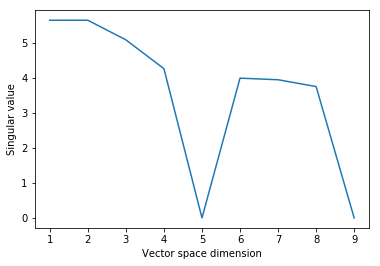

Vector space dimensionality = 8
Singular value (8) = 3.7
Max singular value (1) = 5.6
Singular value (8) = 3.7385588793217883e-10
Silhouette index in a range of cluster numbers


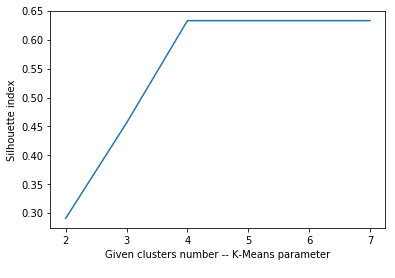

Optimal number of clusters: 4
Cluster words in vector space, axes 1 and 3


Parent,Category,Quality,Words,Relevance
C00,C01,0.0,"['.', 'LEFT-WALL', 'has', 'isa']","[0, 0, 0, 0]"
C00,C02,0.0,"['eagle', 'herring', 'parrot', 'tuna']","[0, 0, 0, 0]"
C00,C03,0.0,"['bird', 'extremity', 'fish']","[0, 0, 0]"
C00,C04,0.0,"['feather', 'fin', 'scale', 'wing']","[0, 0, 0, 0]"



Category list - 4 lines, saved to /home/obaskov/language-learning/output/POC_Turtle-2018-04-14/MST_fixed_manually/disjuncts-DRK-disjuncts/categories.txt


Cluster,Germs,L,R,Disjuncts
C01,"['.', 'LEFT-WALL', 'has', 'isa']",[],[],"['C03C01-', 'C04C01-', 'C01C04+', 'C01C02+', 'C02C01- & C01C04+', 'C04C01- & C01C04+', 'C02C01- & C01C03+', 'C04C01- & C01C03+']"
C02,"['eagle', 'herring', 'parrot', 'tuna']",[],[],"['C01C02- & C02C01+', 'C01C02- & C02C01+', 'C01C02- & C02C01+', 'C01C02- & C02C01+']"
C03,"['bird', 'extremity', 'fish']",[],[],"['C01C03- & C03C01+', 'C01C03- & C03C01+', 'C01C03- & C03C01+']"
C04,"['feather', 'fin', 'scale', 'wing']",[],[],"['C01C04- & C04C01+', 'C01C04- & C04C01+', 'C01C04- & C04C01+', 'C01C04- & C04C01+']"


'Link Grammar file saved to: /home/obaskov/language-learning/output/POC_Turtle-2018-04-14/MST_fixed_manually/disjuncts-DRK-disjuncts/poc-english_4C_2018-04-14_0007.4.0.dict'

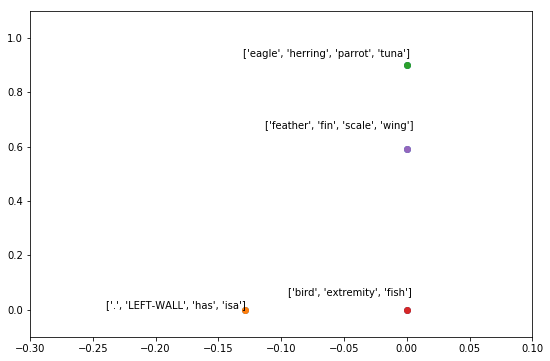

In [4]:
input_dir = module_path + '/data/POC_Turtle/MST_fixed_manually/'
prj_dir = batch_dir + 'MST_fixed_manually/disjuncts-DRK-disjuncts/'
test_learn_frammar(input_dir, prj_dir, left_wall, period, context, \
    word_space, dim_reduction, clustering, grammar_rules, verbose)

_MST parse, fixed ~ OK with LEFT WALL. Other parses fail with LEFT-WALL setting_

## R=6_Weight=1 ~ OK without LEFT-WALL
SVD error with LEFT-WALL

14 unique words and 26 unique links form 38 unique word-link pairs from 48 parsed items


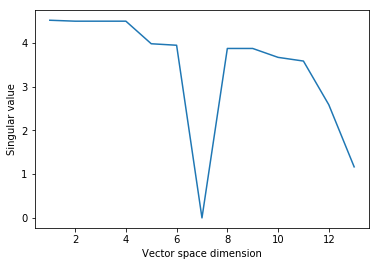

Vector space dimensionality = 13
Singular value (13) = 1.2
Max singular value (1) = 4.5
All singular values within relevance interval - more than 0.1 of max singular value
Silhouette index in a range of cluster numbers


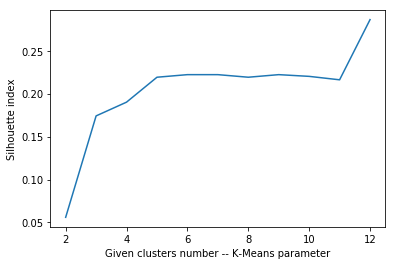

Optimal number of clusters: 12
Cluster words in vector space, axes 1 and 4


Parent,Category,Quality,Words,Relevance
C00,C01,0.0,['fin'],[0]
C00,C02,0.0,['wing'],[0]
C00,C03,0.0,['has'],[0]
C00,C04,0.0,['isa'],[0]
C00,C05,0.0,"['eagle', 'parrot']","[0, 0]"
C00,C06,0.0,"['herring', 'tuna']","[0, 0]"
C00,C07,0.0,['fish'],[0]
C00,C08,0.0,['extremity'],[0]
C00,C09,0.0,['.'],[0]
C00,C10,0.0,['scale'],[0]



Category list - 12 lines, saved to /home/obaskov/language-learning/output/POC_Turtle-2018-04-14/R=6_Weight=1/disjuncts-DRK-disjuncts/categories.txt


Cluster,Germs,L,R,Disjuncts
C01,['fin'],[],[],"['C01C08+', 'C06C01- & C03C01- & C01C09+', 'C01C10+']"
C02,['wing'],[],[],"['C02C11+', 'C05C02- & C03C02- & C02C09+', 'C02C08+']"
C03,['has'],[],[],"['C03C01+', 'C03C02+', 'C03C11+', 'C03C10+']"
C04,['isa'],[],[],"['C04C12+', 'C04C08+', 'C04C07+']"
C05,"['eagle', 'parrot']",[],[],"['C05C12+', 'C05C02+', 'C05C12+', 'C05C02+']"
C06,"['herring', 'tuna']",[],[],"['C06C01+', 'C06C07+', 'C06C01+', 'C06C07+']"
C07,['fish'],[],[],"['C06C07- & C04C07- & C07C09+', 'C04C07- & C06C07- & C07C09+']"
C08,['extremity'],[],[],"['C04C08- & C02C08- & C08C09+', 'C01C08- & C04C08- & C08C09+']"
C09,['.'],[],[],"['C02C09-', 'C08C09-', 'C11C09-', 'C07C09-', 'C01C09-', 'C10C09-', 'C12C09-']"
C10,['scale'],[],[],['C01C10- & C03C10- & C10C09+']


'Link Grammar file saved to: /home/obaskov/language-learning/output/POC_Turtle-2018-04-14/R=6_Weight=1/disjuncts-DRK-disjuncts/poc-english_12C_2018-04-14_0007.4.0.dict'

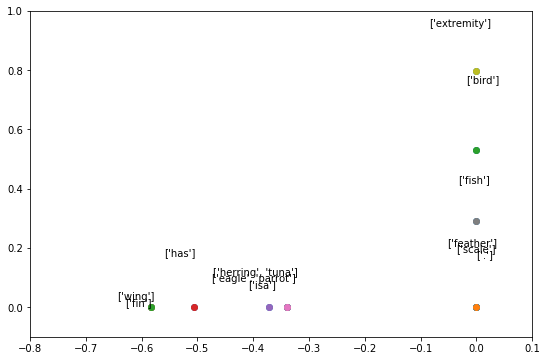

In [5]:
left_wall = ''
input_dir = module_path + '/data/POC_Turtle/R=6_Weight=1/'
prj_dir = batch_dir + 'R=6_Weight=1/disjuncts-DRK-disjuncts/'
test_learn_frammar(input_dir, prj_dir, left_wall, period, context, \
    word_space, dim_reduction, clustering, grammar_rules, verbose)

## R=6_Weight=6:R ~ OK without LW, SVD error with LEFT-WALL

14 unique words and 25 unique links form 38 unique word-link pairs from 48 parsed items


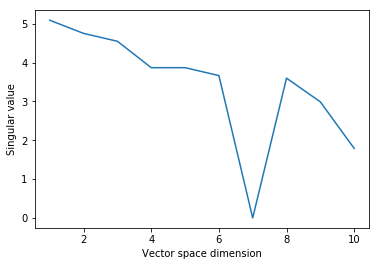

Vector space dimensionality = 10
Singular value (10) = 1.8
Max singular value (1) = 5.1
All singular values within relevance interval - more than 0.1 of max singular value
Silhouette index in a range of cluster numbers


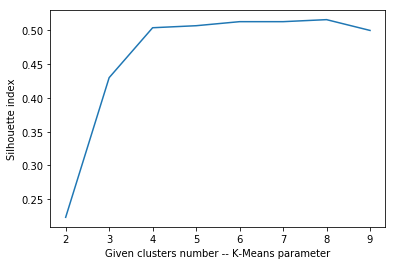

Optimal number of clusters: 4
Cluster words in vector space, axes 1 and 3


Parent,Category,Quality,Words,Relevance
C00,C01,0.0,"['bird', 'extremity', 'fish']","[0, 0, 0]"
C00,C02,0.0,"['.', 'feather', 'fin', 'has', 'wing']","[0, 0, 0, 0, 0]"
C00,C03,0.0,"['eagle', 'herring', 'parrot', 'tuna']","[0, 0, 0, 0]"
C00,C04,0.0,"['isa', 'scale']","[0, 0]"



Category list - 4 lines, saved to /home/obaskov/language-learning/output/POC_Turtle-2018-04-14/R=6_Weight=6:R/disjuncts-DRK-disjuncts/categories.txt


Cluster,Germs,L,R,Disjuncts
C01,"['bird', 'extremity', 'fish']",[],[],"['C04C01- & C01C02+', 'C04C01- & C01C02+', 'C04C01- & C01C02+']"
C02,"['.', 'feather', 'fin', 'has', 'wing']",[],[],"['C02C02-', 'C01C02-', 'C04C02-', 'C02C02- & C02C02- & C02C02+', 'C02C02- & C02C02+', 'C02C04+', 'C03C02- & C02C02+', 'C02C04+', 'C02C02+', 'C02C02- & C02C02+', 'C02C04+', 'C02C02+']"
C03,"['eagle', 'herring', 'parrot', 'tuna']",[],[],"['C03C02+', 'C03C04+', 'C03C02+', 'C03C04+', 'C03C02+', 'C03C04+', 'C03C02+', 'C03C04+']"
C04,"['isa', 'scale']",[],[],"['C02C04- & C04C01+', 'C03C04- & C04C01+', 'C02C04- & C02C04- & C04C02+']"


'Link Grammar file saved to: /home/obaskov/language-learning/output/POC_Turtle-2018-04-14/R=6_Weight=6:R/disjuncts-DRK-disjuncts/poc-english_4C_2018-04-14_0007.4.0.dict'

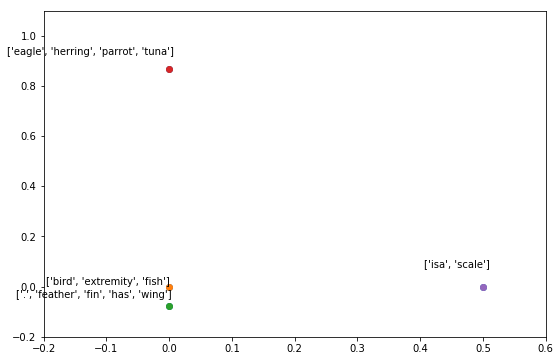

In [6]:
left_wall = ''
input_dir = module_path + '/data/POC_Turtle/R=6_Weight=6:R/'
prj_dir = batch_dir + 'R=6_Weight=6:R/disjuncts-DRK-disjuncts/'
test_learn_frammar(input_dir, prj_dir, left_wall, period, context, \
    word_space, dim_reduction, clustering, grammar_rules, verbose)

## LG_ANY_all_parses ~ OK without LEFT-WALL

14 unique words and 25 unique links form 38 unique word-link pairs from 48 parsed items


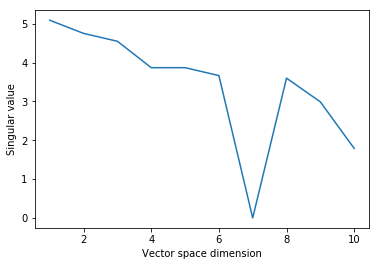

Vector space dimensionality = 10
Singular value (10) = 1.8
Max singular value (1) = 5.1
All singular values within relevance interval - more than 0.1 of max singular value
Silhouette index in a range of cluster numbers


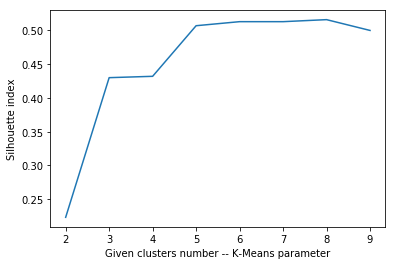

Optimal number of clusters: 5
Cluster words in vector space, axes 1 and 3


Parent,Category,Quality,Words,Relevance
C00,C01,0.0,"['bird', 'extremity', 'fish']","[0, 0, 0]"
C00,C02,0.0,['feather'],[0]
C00,C03,0.0,"['.', 'fin', 'has', 'wing']","[0, 0, 0, 0]"
C00,C04,0.0,"['eagle', 'herring', 'parrot', 'tuna']","[0, 0, 0, 0]"
C00,C05,0.0,"['isa', 'scale']","[0, 0]"



Category list - 5 lines, saved to /home/obaskov/language-learning/output/POC_Turtle-2018-04-14/LG_ANY_all_parses/disjuncts-DRK-disjuncts/categories.txt


Cluster,Germs,L,R,Disjuncts
C01,"['bird', 'extremity', 'fish']",[],[],"['C05C01- & C01C03+', 'C05C01- & C01C03+', 'C05C01- & C01C03+']"
C02,['feather'],[],[],['C03C02- & C03C02- & C02C03+']
C03,"['.', 'fin', 'has', 'wing']",[],[],"['C05C03-', 'C02C03-', 'C01C03-', 'C03C03-', 'C03C05+', 'C03C03- & C03C03+', 'C03C02+', 'C03C05+', 'C04C03- & C03C03+', 'C03C02+', 'C03C05+', 'C03C03- & C03C03+']"
C04,"['eagle', 'herring', 'parrot', 'tuna']",[],[],"['C04C03+', 'C04C05+', 'C04C03+', 'C04C05+', 'C04C03+', 'C04C05+', 'C04C03+', 'C04C05+']"
C05,"['isa', 'scale']",[],[],"['C04C05- & C05C01+', 'C03C05- & C05C01+', 'C03C05- & C03C05- & C05C03+']"


'Link Grammar file saved to: /home/obaskov/language-learning/output/POC_Turtle-2018-04-14/LG_ANY_all_parses/disjuncts-DRK-disjuncts/poc-english_5C_2018-04-14_0007.4.0.dict'

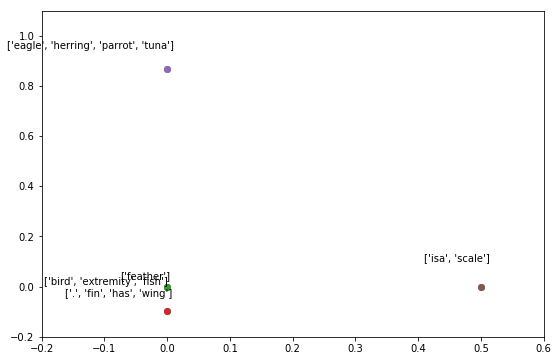

In [7]:
left_wall = ''
input_dir = module_path + '/data/POC_Turtle/LG_ANY_all_parses/'
prj_dir = batch_dir + 'LG_ANY_all_parses/disjuncts-DRK-disjuncts/'
test_learn_frammar(input_dir, prj_dir, left_wall, period, context, \
    word_space, dim_reduction, clustering, grammar_rules, verbose)

# "Disjuncts-ILE-Disjuncts" 

## MST fixed manually, detailed

In [8]:
context = 2                     # 1: connectors / 2+: 'dusjuncts'
word_space = 'discrete'         # 80411 Turtle grouping test 
dim_reduction = 'none'          # 80411 Turtle grouping test 
clustering = 'group'            # 80411 Turtle grouping test 
grammar_rules = 2               # 1: connectors / 2+: 'dusjuncts'
verbose = 'mid'

# Paths to store learned categories, learned dictionary Link Grammar file
prj_dir = batch_dir + '/MST_fixed_manually/disjuncts-ILE-disjuncts/'
lg_rules_file = test_learn_frammar(input_dir, prj_dir, left_wall, period, \
    context, word_space, dim_reduction, clustering, grammar_rules, verbose)
print('\nLG rules file saved to', lg_rules_file[63:])

14 unique words and 25 unique links form 38 unique word-link pairs from 48 parsed items
Total 9 clusters of identical lexical entries <class 'pandas.core.frame.DataFrame'>


Parent,Category,Quality,Words,Relevance
C00,C01,0.0,['.'],[0]
C00,C02,0.0,"['bird', 'extremity', 'fish']","[0, 0, 0]"
C00,C03,0.0,"['eagle', 'herring', 'parrot', 'tuna']","[0, 0, 0, 0]"
C00,C04,0.0,['feather'],[0]
C00,C05,0.0,['fin'],[0]
C00,C06,0.0,['has'],[0]
C00,C07,0.0,['isa'],[0]
C00,C08,0.0,['scale'],[0]
C00,C09,0.0,['wing'],[0]



Category list - 9 lines, saved to /home/obaskov/language-learning/output/POC_Turtle-2018-04-14//MST_fixed_manually/disjuncts-ILE-disjuncts/categories.txt


Cluster,Germs,L,R,Disjuncts
C01,['.'],[],[],"['C05C01-', 'C09C01-', 'C02C01-', 'C04C01-', 'C08C01-']"
C02,"['bird', 'extremity', 'fish']",[],[],"['C07C02- & C02C01+', 'C07C02- & C02C01+', 'C07C02- & C02C01+']"
C03,"['eagle', 'herring', 'parrot', 'tuna']",[],[],"['C03C06+', 'C03C07+', 'C03C06+', 'C03C07+', 'C03C06+', 'C03C07+', 'C03C06+', 'C03C07+']"
C04,['feather'],[],[],['C09C04- & C06C04- & C04C01+']
C05,['fin'],[],[],"['C06C05- & C05C01+', 'C05C08+', 'C05C07+']"
C06,['has'],[],[],"['C03C06- & C06C05+', 'C06C08+', 'C06C04+', 'C03C06- & C06C09+']"
C07,['isa'],[],[],"['C09C07- & C07C02+', 'C05C07- & C07C02+', 'C03C07- & C07C02+']"
C08,['scale'],[],[],['C05C08- & C06C08- & C08C01+']
C09,['wing'],[],[],"['C06C09- & C09C01+', 'C09C04+', 'C09C07+']"



LG rules file saved to /POC_Turtle-2018-04-14//MST_fixed_manually/disjuncts-ILE-disjuncts/poc-english_9C_2018-04-14_0007.4.0.dict


## "Disjuncts - ILE - Disjuncts", batch mode

In [9]:
verbose = 'min'
input_batch = module_path + '/data/POC_Turtle/'
dirs = sorted([x[0] for x in os.walk(input_batch)][1:])
#print('dirs:', dirs)
for d in dirs:
    prj_dir = batch_dir + d[d.rfind('/')+1:] + '/disjuncts-ILE-disjuncts/'
    lg_rules_file = test_learn_frammar(input_dir, prj_dir, left_wall, period, \
        context, word_space, dim_reduction, clustering, grammar_rules, verbose)
    print('LG rules file saved to', lg_rules_file[63:], '\n')

LG rules file saved to /POC_Turtle-2018-04-14/LG_ANY_all_parses/disjuncts-ILE-disjuncts/poc-english_9C_2018-04-14_0007.4.0.dict 

LG rules file saved to /POC_Turtle-2018-04-14/MST_fixed_manually/disjuncts-ILE-disjuncts/poc-english_9C_2018-04-14_0007.4.0.dict 

LG rules file saved to /POC_Turtle-2018-04-14/R=6_Weight=1/disjuncts-ILE-disjuncts/poc-english_9C_2018-04-14_0007.4.0.dict 

LG rules file saved to /POC_Turtle-2018-04-14/R=6_Weight=6:R/disjuncts-ILE-disjuncts/poc-english_9C_2018-04-14_0007.4.0.dict 



# "Connectors-DRK-Disjuncts", batch mode

## LEFT-WALL and period

In [10]:
context = 1
verbose = 'none'
input_batch = module_path + '/data/POC_Turtle/'
dirs = sorted([x[0] for x in os.walk(input_batch)])[1:]
#-print('dirs:', dirs, '\n')
for d in dirs:
    if verbose != 'none': print('Input dir:', d)
    prj_dir = batch_dir + d[d.rfind('/')+1:] + '/connectors-DRK-disjuncts/'
    lg_rules_file = test_learn_frammar(input_dir, prj_dir, left_wall, period, \
        context, word_space, dim_reduction, clustering, grammar_rules, verbose)
    print('LG rules file saved to', lg_rules_file[63:], '\n')

LG rules file saved to /POC_Turtle-2018-04-14/LG_ANY_all_parses/connectors-DRK-disjuncts/poc-english_9C_2018-04-14_0007.4.0.dict 

LG rules file saved to /POC_Turtle-2018-04-14/MST_fixed_manually/connectors-DRK-disjuncts/poc-english_9C_2018-04-14_0007.4.0.dict 

LG rules file saved to /POC_Turtle-2018-04-14/R=6_Weight=1/connectors-DRK-disjuncts/poc-english_9C_2018-04-14_0007.4.0.dict 

LG rules file saved to /POC_Turtle-2018-04-14/R=6_Weight=6:R/connectors-DRK-disjuncts/poc-english_9C_2018-04-14_0007.4.0.dict 

